# Ling Thang 
## Homework 1 - Linear Regression and Gradient Descent
## Machine Learning CS-3120

## Sources 

- Majority of the code for the math came from Blair's lecture and example.



# Import the packages for the project

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Data Sample

In [27]:
x_data = np.array([35., 38., 31., 20., 22., 25., 17., 60., 8., 60.])
y_data= np.array([129.54611622, 135.54611622, 121.54611622, 99.54611622, 103.54611622, 109.54611622, 93.54611622, 179.54611622, 75.54611622, 179.54611622])


# Loss Function

In [28]:
bb = np.arange(0,100,1) #bias
ww = np.arange(-5, 5,0.1) #weight
Z = np.zeros((len(bb),len(ww)))

for i in range(len(bb)):
  for j in range(len(ww)):
    b = bb[i]
    w = ww[j]
    Z[j][i] = 0
    for n in range(len(x_data)):
      Z[j][i] = Z[j][i] + (w*x_data[n]+b - y_data[n])**2 # this is the loss
      Z[j][i] = Z[j][i]/len(x_data)

- Nested For Loop to iterate through all the combinations of bias and weight vaules to calculate the loss for each combination

# PLOTTING

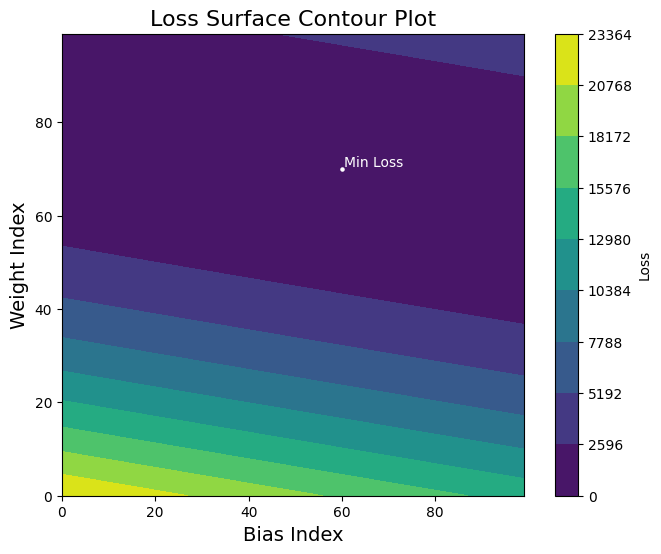

In [38]:
# meshgrid
X, Y = np.meshgrid(range(bb.shape[0]), range(ww.shape[0]))

min_index = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
levels_ml = np.linspace(np.min(Z), np.max(Z), 10)

# building the plot
plt.figure(figsize=(8, 6))
plot = plt.contourf(X, Y, Z, levels=levels_ml)
plt.xlabel('Bias Index', fontsize=14)
plt.ylabel('Weight Index', fontsize=14)
plt.axis('scaled')
plt.colorbar(label="Loss")
plt.scatter(X[min_index], Y[min_index], c='w', marker='o', s=5)
plt.annotate("Min Loss", xy=(X[min_index], Y[min_index]), xytext=(X[min_index]+0.5, Y[min_index]+0.5), color='w')
plt.draw()

# adding title to the figure
plt.title("Loss Surface Contour Plot", fontsize=16)
plt.show()

# Gradient Descent
- Credits to Blair for the code during presentation

In [39]:
def gradient_descent(x_data, y_data, b: float, w: float, iterations: int, learning_rate: float, b_history: list, w_history: list):
  for i in range(iterations):
      # predicted value
      y_pred = w * x_data + b

      # compute gradients
      grad_w = (2/len(x_data)) * np.dot(x_data, (y_pred - y_data))
      grad_b = (2/len(x_data)) * np.sum(y_pred - y_data)

      # update parameters
      w = w - learning_rate * grad_w
      b = b - learning_rate * grad_b

      # store parameters in history
      b_history.append(b)
      w_history.append(w)

# Data Training

In [40]:
# initial parameters
b = 0  # initial bias
w = 0  # initial weight
learning_rate = 0.00001
iterations = 1000000


b_init_history = [b]
w_init_history = [w]
gradient_descent(x_data, y_data, b, w, iterations, learning_rate, b_init_history, w_init_history)

# New parameters for the model with initial bias and weight as 100
b = 100  # initial bias
w = 100  # initial weight

learning_rate = 0.00001
iterations = 1000000
b_history2 = [b]
w_history2 = [w]
gradient_descent(x_data, y_data, b, w, iterations, learning_rate, b_history2, w_history2)


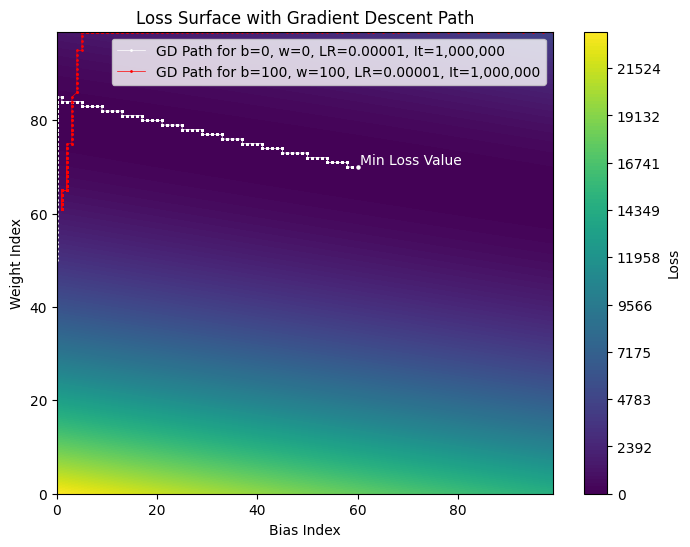

In [41]:
def value_to_index(values, array):
    indices = [np.abs(array - value).argmin() for value in values]
    return indices

b_indices_1 = value_to_index(b_init_history, bb)
w_indices_1 = value_to_index(w_init_history, ww)

b_indices_2 = value_to_index(b_history2, bb)
w_indices_2 = value_to_index(w_history2, ww)

plt.figure(figsize=(8, 6))
levels_ml = np.linspace(np.min(Z), np.max(Z), 128)
plt.contourf(range(bb.shape[0]), range(ww.shape[0]), Z, levels=levels_ml)
plt.colorbar(label="Loss")
plt.plot(b_indices_1, w_indices_1,'o-', ms=1, lw=0.5, color='white',label='GD Path for b=0, w=0, LR=0.00001, It=1,000,000')
plt.plot(b_indices_2, w_indices_2,'o-', ms=1, lw=0.5, color='red',label='GD Path for b=100, w=100, LR=0.00001, It=1,000,000')

# draw min loss from first plot
plt.scatter(X[min_index], Y[min_index], c='w', marker='o', s=5)
plt.annotate("Min Loss Value", xy=(X[min_index], Y[min_index]), xytext=(X[min_index]+0.5, Y[min_index]+0.5), color='w')
plt.draw()

plt.xlabel('Bias Index')
plt.ylabel('Weight Index')
plt.title("Loss Surface with Gradient Descent Path")
plt.legend()
plt.show()